In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read the service file

In [3]:
df = pd.read_csv('C:/Users/harsh/Documents/analytics vidhya_Medium/Sales/train.csv', encoding = 'unicode_escape')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df['Category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [6]:
list(df.columns)

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales']

In [7]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [8]:
df['Sub-Category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

In [9]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [10]:
agg1 = df.groupby('Category').agg(Total_sales= ('Sales', 'sum')).reset_index()
                                  #,Mean_Sales = ('Sales', 'mean')).reset_index()
agg1

,Category,Total_sales
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,827455.8730


In [11]:
df.shape

(9800, 18)

In [12]:
col_name = 'Category'
num_services = 3
cat_value = 'Furniture'

In [13]:
#A function to divide a column evenly into percentiles
def split_into_percent(rank_max, low, high):
    temp = [x.tolist() for x in np.array_split(range(rank_max), (high - low + 1))]
    temp1 = []
    for x in temp:
        for y in x:
            temp1.append(low)
        low += 1
    return temp1

## Plot single line for 1 category

In [14]:
#one line plot by category = Office Supplies
cat = 'Office Supplies'
filtered_df = df[df['Category'] == cat]

#aggregate given service data by finding the sum of the weekly cost by client ID
agg_df = filtered_df.groupby('Customer ID')['Sales'].agg('sum').reset_index()

#sort weekly cost values 
agg_df = agg_df.sort_values(['Sales'], ascending = True)
#print(agg_df)
    
    #calculate rank and percentile
agg_df['Rank'] = np.arange(len(agg_df))+1
agg_df['Percentile'] = split_into_percent(agg_df['Rank'].max(), 1, 100)

    #calculate average cost per percentile
agg_df['Total Sales'] = agg_df.groupby('Percentile')['Sales'].transform('sum')
agg_df['Customers per percentile'] = agg_df.groupby('Percentile')['Customer ID'].transform('count')
agg_df['Avg sales per percentile'] = agg_df['Total Sales'] / agg_df['Customers per percentile']
print(agg_df)

    Customer ID      Sales  Rank  Percentile  Total Sales  \
505    MG-18205      4.419     1           1       71.994   
754    TS-21085      4.833     2           1       71.994   
453    LD-16855      5.304     3           1       71.994   
417    KC-16540      9.906     4           1       71.994   
520    ML-18265     10.272     5           1       71.994   
..          ...        ...   ...         ...          ...   
256    EH-13765   8524.336   783         100    62498.422   
159    CM-12385   8725.172   784         100    62498.422   
431    KL-16645   9654.950   785         100    62498.422   
6      AB-10105  11489.256   786         100    62498.422   
665    SC-20095  12081.258   787         100    62498.422   

     Customers per percentile  Avg sales per percentile  
505                         8                   8.99925  
754                         8                   8.99925  
453                         8                   8.99925  
417                         8      

119.4 896.3


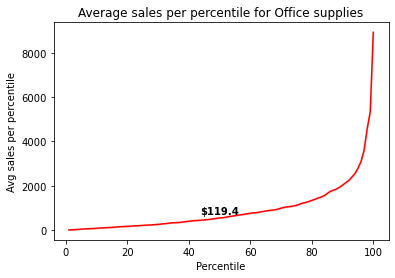

In [15]:
p = sns.lineplot(x = 'Percentile', y = 'Avg sales per percentile', data = agg_df, color = 'red')
p.set_title('Average sales per percentile for Office supplies')
mean1 = round(df[df['Category'] == cat]['Sales'].mean(), 1)
p.text(50, mean1+600 , '$'+str(mean1), horizontalalignment='center',size='medium',color='black',weight='semibold')
mean2 = round(agg_df['Avg sales per percentile'].mean(), 1)
print(mean1, mean2)

In [16]:
print(split_into_percent(16,1,4))

[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]


## Stack multiple lines horizontally

In [17]:
import numpy as np
#A function that takes the name of service as an argument and returns the data frame with aggregated percentile and weekly cost per percentile by that service
def agg_df_by_category(col_name, category, low, high):
    #create a dataframe for data for given services
    filtered_df = df[df[col_name] == category]
    filtered_df.shape

    #aggregate given service data by finding the sum of the weekly cost by client ID
    agg_df = filtered_df.groupby('Customer ID')['Sales'].agg('sum').reset_index()
    agg_df

    #sort weekly cost values 
    agg_df = agg_df.sort_values(['Sales'], ascending = True)
    agg_df
    
    #calculate rank and percentile
    agg_df['Rank'] = np.arange(len(agg_df))+1
    agg_df['Percentile'] = split_into_percent(agg_df['Rank'].max(), low, high)
    #np.round(agg_df['Rank'] / agg_df['Rank'].max() * (high - low), 0) + low
    agg_df

    #calculate average cost per percentile
    agg_df['Total sales'] = agg_df.groupby('Percentile')['Sales'].transform('sum')
    agg_df['Customers per percentile'] = agg_df.groupby('Percentile')['Customer ID'].transform('count')
    agg_df['Avg sales per percentile'] = agg_df['Total sales'] / agg_df['Customers per percentile']
    
    mean = np.round(filtered_df['Sales'].mean(), 1)
    return agg_df, mean


In [18]:
sales_by_col = df.groupby('Category')['Sales'].agg('sum').sort_values(ascending = False).reset_index()
sales_by_col['Percentage'] = sales_by_col['Sales']/sum(sales_by_col['Sales']) * 100
sales_by_col

,Category,Sales,Percentage
0,Technology,827455.8730,36.588212
1,Furniture,728658.5757,32.219621
2,Office Supplies,705422.3340,31.192167


In [19]:
#duplicate code without num_services
def stacked_line_plot(col_name):
    
    #calculate the sales by categories
    sales_by_col = df.groupby(col_name)['Sales'].agg('sum').sort_values(ascending = False).reset_index()

    #calculate percentage contribution of the  services from total
    sales_by_col['Percentage'] = sales_by_col['Sales']/sum(sales_by_col['Sales']) * 100

    #list of column values
    col_values_list = list( sales_by_col[col_name])
    
    #loop for the entire list of column values
    low_pct, high_pct = 0, 0
    handle = []
    colors = ['red', 'green', 'blue', 'brown', 'yellow', 'pink', 'black']
    for i in range(len(col_values_list)):
        
        high_pct += sales_by_col['Percentage'].iloc[i]
        
        #prepare the data for single line plot
        df_top_category, mean = agg_df_by_category(col_name, col_values_list[i], low_pct, high_pct)
        
        #plot the data
        p = sns.lineplot(x = 'Percentile', y = 'Avg sales per percentile', data = df_top_category, color = colors[i], label = col_values_list[i])
        
        #calculate and display the median-value
        xlim = p.get_xlim()
        x_offset = (xlim[1] - xlim[0]+ low_pct) / 2 
        p.text(x_offset-10, mean , 'Mean:\n$'+str(mean), horizontalalignment='center',size='medium',color='black',weight='semibold')
        
        #add the line graph to the same plot
        handle.append(p)

        low_pct = high_pct
    
    #set the axis, titles, x & y labels
    sns.set(style="whitegrid")
    
    plt.title("Average sales per percentile by "+col_name, weight = 'bold', size = 'large')
    plt.ylabel("Average sales per percentile(in USD)")
    plt.xlabel("Percentile")
    plt.legend( title = col_name, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()



In [22]:
pd.options.mode.chained_assignment = None
#A function that takes name of the column & number of services to be plotted as input and outputs a graph with that many line plots
def stacked_line_plot(col_name, num_services=3):
    
    #df1 = df1[df1[col_name] != '-']
    #calculate the top services
    cost_by_services = df.groupby(col_name)['Sales'].agg('sum').reset_index()
    top_services = cost_by_services[cost_by_services['Sales'].isin(cost_by_services['Sales'].sort_values(ascending = False).head(num_services))]
    #print(top_services)
    
    #calculate percentage of all the  services from total
    top_services['Percentage'] = top_services['Sales']/sum(top_services['Sales']) * 100
    sorted_top_services = top_services.sort_values('Percentage', ascending = False)
    print(sorted_top_services)

    #list of top services
    top_services_list = list(sorted_top_services[col_name])
    
    #loop for the entire list of top services
    low_pct, high_pct = 0, 0
    handle = []
    colors = ['red', 'green', 'blue', 'brown', 'yellow', 'pink', 'black']
    for i in range(len(top_services_list)):
        
        high_pct += sorted_top_services['Percentage'].iloc[i]
        
        #create a data frame filtered by each service
        df_top_service, mean = agg_df_by_category(col_name, top_services_list[i], low_pct, high_pct)
        #print(df_top_service.shape, mean)
        
        #plot the data
        p = sns.lineplot(x = 'Percentile', y = 'Avg sales per percentile', data = df_top_service, color = colors[i], label = top_services_list[i])
        
        #calculate and display the median-value
        xlim = p.get_xlim()
        x_offset = (xlim[1] - xlim[0]+ low_pct) / 2 
        if num_services <= 4:
            p.text(x_offset-10, mean , 'Mean:\n£'+str(mean), horizontalalignment='center',size='medium',color='black',weight='semibold')
        else:
            p.text(x_offset-10, mean , '£'+str(mean), horizontalalignment='center',size='medium',color='black',weight='semibold')
    
        handle.append(p)

        low_pct = high_pct
    
    #ax.legend(handle, top_services_list) 
    sns.set(style="whitegrid")
    
    plt.title("Average sales for top "+str(num_services)+' '+col_name, weight = 'bold', size = 'large')
    plt.ylabel("Weekly Cost(in GBP)")
    plt.xlabel("Percentile")
    plt.legend( title = 'Top ' + col_name, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()



          Category        Sales  Percentage
2       Technology  827455.8730   36.588212
0        Furniture  728658.5757   32.219621
1  Office Supplies  705422.3340   31.192167


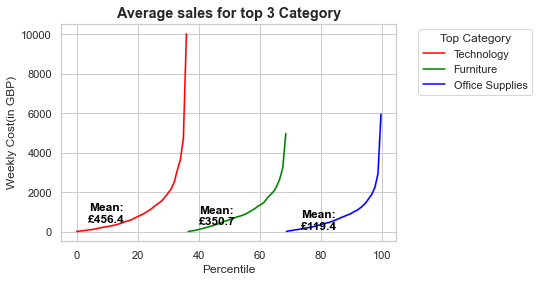

In [25]:
stacked_line_plot('Category')

       Segment         Sales  Percentage
0     Consumer  1.148061e+06   50.764619
1    Corporate  6.884941e+05   30.443638
2  Home Office  4.249822e+05   18.791743


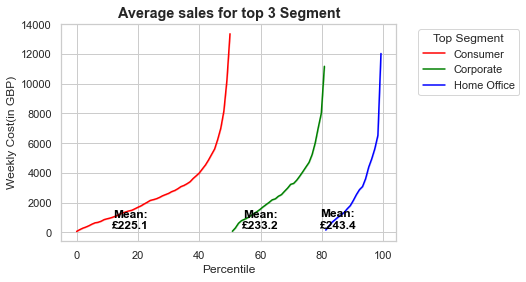

In [26]:
stacked_line_plot('Segment')

        Ship Mode         Sales  Percentage
3  Standard Class  1.340831e+06   62.763665
2    Second Class  4.499142e+05   21.060265
0     First Class  3.455723e+05   16.176070


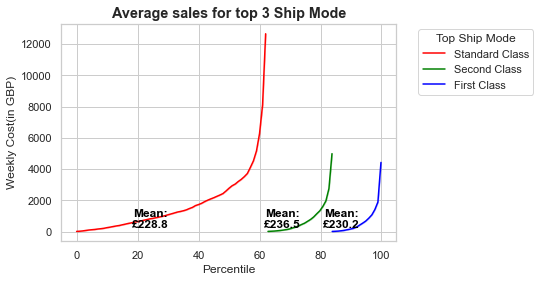

In [27]:
stacked_line_plot('Ship Mode')

    Region        Sales  Percentage
3     West  710219.6845   37.931278
1     East  669518.7260   35.757529
0  Central  492646.9132   26.311193


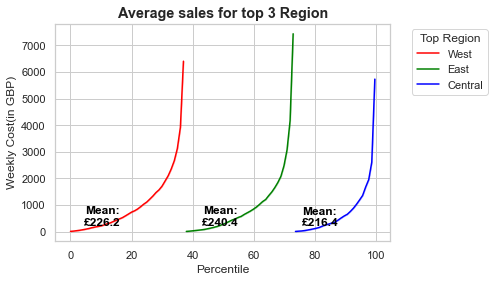

In [28]:
stacked_line_plot('Region')

## Facet grids of stacked line plots

In [29]:
def agg_df_by_category_new(df, col_name, service, low, high):
    #create a dataframe for data for given services
    filtered_df = df[df[col_name] == service]
    filtered_df.shape

    #aggregate given service data by finding the sum of the weekly cost by client ID
    agg_df = filtered_df.groupby('Customer ID')['Sales'].agg('sum').reset_index()
    agg_df

    #sort weekly cost values 
    agg_df = agg_df.sort_values(['Sales'], ascending = True)
    agg_df
    
    #calculate rank and percentile
    agg_df['Rank'] = np.arange(len(agg_df))+1
    agg_df['Percentile'] = split_into_percent(agg_df['Rank'].max(), low, high)
    #np.round(agg_df['Rank'] / agg_df['Rank'].max() * (high - low), 0) + low
    agg_df

    #calculate average cost per percentile
    agg_df['Total sales'] = agg_df.groupby('Percentile')['Sales'].transform('sum')
    agg_df['Customers per percentile'] = agg_df.groupby('Percentile')['Customer ID'].transform('count')
    agg_df['Avg sales per percentile'] = agg_df['Total sales'] / agg_df['Customers per percentile']
    
    mean = np.round(filtered_df['Sales'].mean(), 1)
    return agg_df, mean

In [30]:
def stacked_line_plot(*args, **kwargs):
    #function to create stacked line plots to be used in facet grid
    
    df = kwargs.pop('data')
    col1= args[0]
   
    sales_by_col = df.groupby(['Category'])['Sales'].agg('sum').sort_values(ascending = False).reset_index()
    
    #calculate percentage of all the  services from total
    sales_by_col['Percentage'] = sales_by_col['Sales']/sum(sales_by_col['Sales']) * 100

    #list of top services
    col_values_list = list(sales_by_col['Category'])
    
    #loop for the entire list of top services
    low_pct, high_pct = 0, 0
    handle = []
    colors_category= {'Technology':'Red', 'Furniture':'green', 'Office Supplies':'blue'}
    for i in range(len(col_values_list)):
        
        high_pct += sales_by_col['Percentage'].iloc[i]
        
        #create a data frame filtered by each service
        df_top_category, mean = agg_df_by_category_new(df, col_name, col_values_list[i], low_pct, high_pct)
        #print(df_top_category.shape, mean)
        
        #plot the data
        p = sns.lineplot(x = 'Percentile', y = 'Avg sales per percentile', data = df_top_category, color = colors_category[col_values_list[i]], label = col_values_list[i])
        
        #calculate and display the mean-value
        xlim = p.get_xlim()
        x_offset = (xlim[1] - xlim[0]+ low_pct) / 2 
       # print('********', x_offset)

        p.text(i*50, mean , 'Mean:\n£'+str(mean), horizontalalignment='center',size='medium',color='black',weight='semibold')
        handle.append(p)

        low_pct = high_pct
    
    
    sns.set(style="whitegrid")
    
    plt.title("Average Weekly cost for Top "+str(num_services)+' '+col_name, weight = 'bold', size = 'large')
    plt.ylabel("Weekly Cost(in GBP)")
    plt.xlabel("Percentile")
    plt.legend( title = 'Top ' + col_name, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    return plt



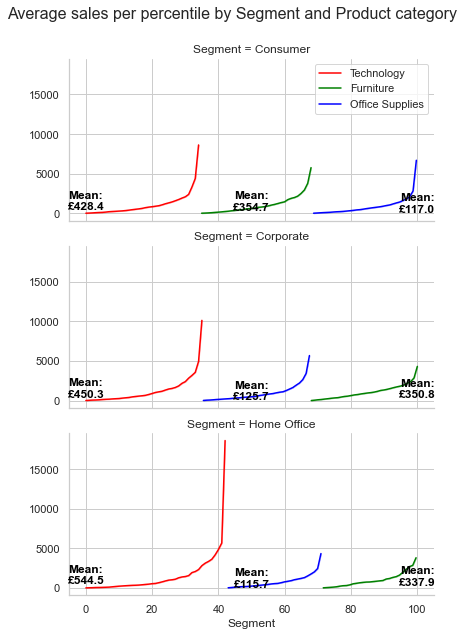

In [31]:
g = sns.FacetGrid(df, row="Segment", margin_titles= False,  aspect = 2)
g.map_dataframe(stacked_line_plot, 'Segment')
g.fig.suptitle('Average sales per percentile by Segment and Product category',fontsize=16)
g.fig.subplots_adjust(top=0.90)
g.axes[0, 0].legend()

In [32]:
df[(df['Segment'] == 'Home Office') & (df['Category'] == 'Technology')]['Sales'].mean()

544.4846895522388

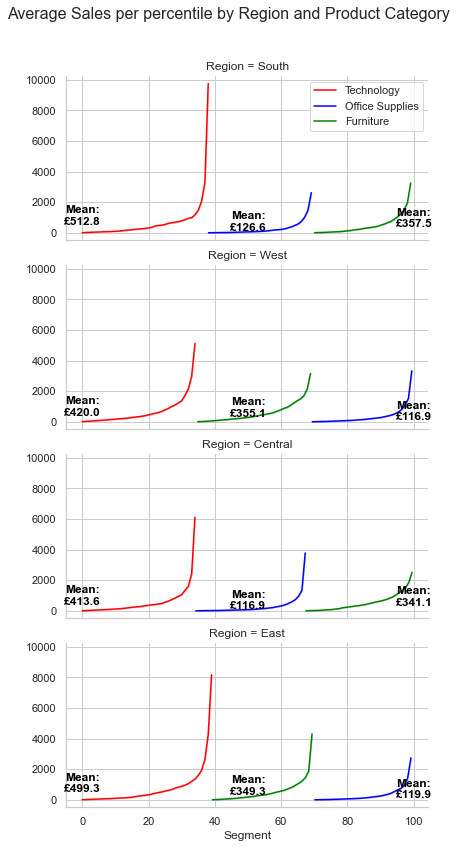

In [33]:
g = sns.FacetGrid(df, row="Region", margin_titles= False,  aspect = 2)
g.map_dataframe(stacked_line_plot, 'Segment')
g.fig.suptitle('Average Sales per percentile by Region and Product Category',fontsize=16)
g.fig.subplots_adjust(top=0.90)
g.axes[0, 0].legend()

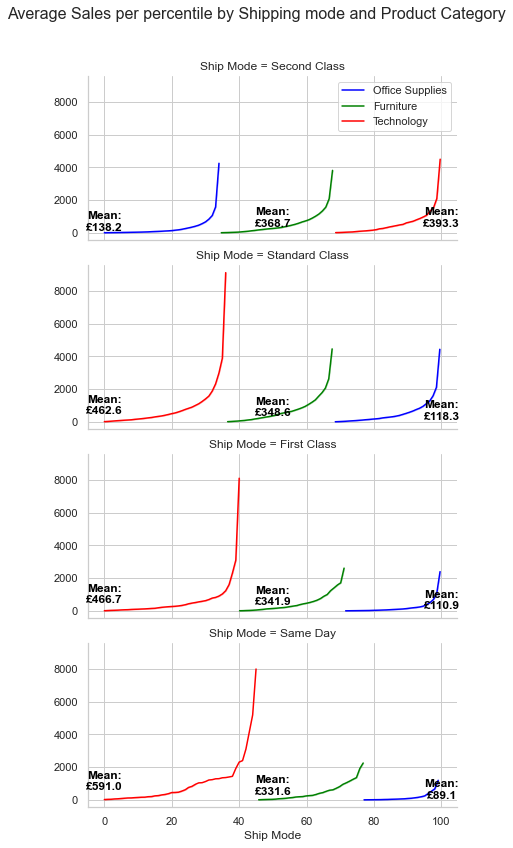

In [34]:
g = sns.FacetGrid(df, row="Ship Mode", margin_titles= False,  aspect = 2)
g.map_dataframe(stacked_line_plot, 'Ship Mode')
g.fig.suptitle('Average Sales per percentile by Shipping mode and Product Category',fontsize=16)
g.fig.subplots_adjust(top=0.90)
g.axes[0, 0].legend()

In [39]:
df[df['Category'] =='Technology']['Sales'].nlargest(10)

2697    22638.480
6826    17499.950
8153    13999.960
2623    11199.968
4190    10499.970
4277     9099.930
8488     8749.950
6425     8399.976
165      8159.952
683      7999.980
Name: Sales, dtype: float64